# Content

Time series clustering using K means with Euclidean and DTW distance

In [1]:
%matplotlib inline
from tslearn.clustering import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
import pandas as pd
import matplotlib


In [2]:
data = pd.read_csv('./data/data_long.csv')

def listify(row):
    row = str(row).replace('[', '').replace(']', '').split(',')
    row = [float(y) for y in row]

    return np.asarray(row)

data.loc[:, 'points'] = data.loc[:, 'points'].apply(listify)

In [3]:
points = data['points']

In [4]:

points = np.array(points.values.tolist())
points.resize(points.shape[0], 900, 1)
print(points.shape)

(1728, 900, 1)


In [5]:
seed = 10
np.random.seed(seed)
X_train = points
sz = X_train.shape[1]

In [6]:

print(np.mean(X_train[1,:]))
print(np.std(X_train[1,:]))

64.16760421441155
31.99767459851701


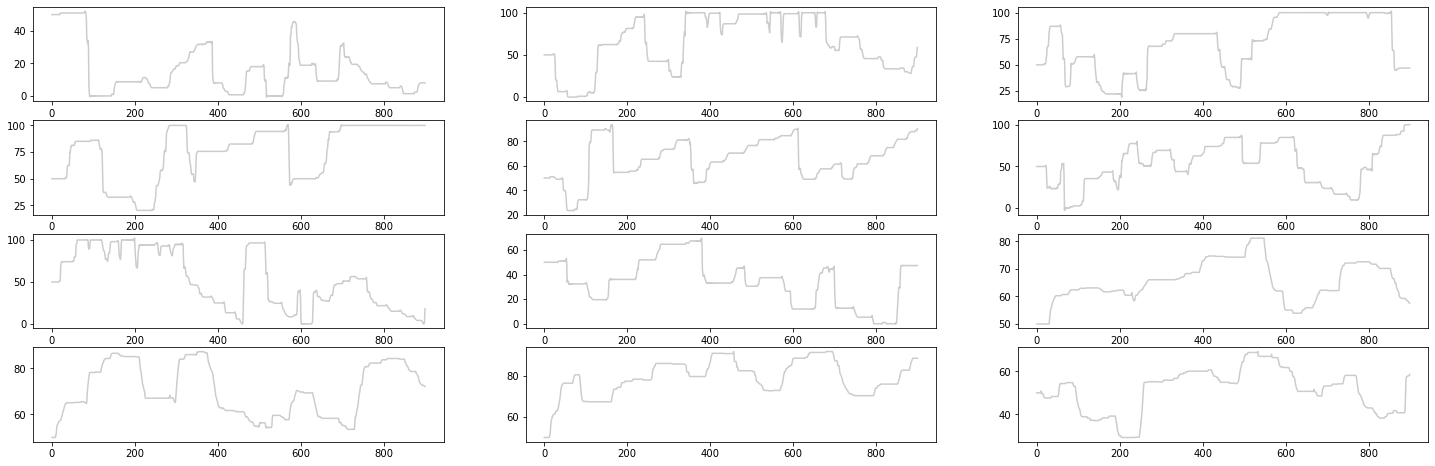

In [7]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(X_train[yi].ravel(), "k-", alpha=.2)

## Training the model
  - using Euclidean distance

In [ ]:
# Euclidean k-means

seed = 10
np.random.seed(seed)


n_clusterss = [27]

for n_clusters in n_clusterss:
    print("Euclidean k-means ---- {}".format(n_clusters))
    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=seed, n_jobs=-1)
    cluster_labels = km.fit_predict(X_train)

    centers = []
    for i in range(0, 27):
        centers.append(list(km.cluster_centers_[i].flatten()))

    pd.DataFrame(np.asarray(centers).transpose()).to_csv("./data/cluster_centers.csv")

    print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X_train, cluster_labels, metric="euclidean")))

    # Plot each average curve independently:
    for yi in range(n_clusters):
        plt.plot(km.cluster_centers_[yi].ravel(), "r-", linewidth=40)
        plt.tight_layout()

        plt.xlim(0, sz)
        plt.ylim(0, 100)
        plt.axis('off')

        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(18.5, 18.5)

        plt.savefig("./plots/cluster/cluster_{}_{}.png".format(yi, n_clusters))
        plt.close()

    plt.figure()
    for yi in range(n_clusters):
        plt.subplot(9, 3, yi + 1)
        for xx in X_train[cluster_labels == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")

        plt.xlim(0, sz)
        plt.ylim(0, 100)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Euclidean $k$-means")

        print("Cluster {} done!".format(yi))

    data['cluster_labels'] = cluster_labels
    data.to_csv("./data/data_long_cluster_{}.csv".format(str(n_clusters)))
    plt.tight_layout()

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10, 20)

    plt.savefig("./plots/cluster/k_means_{}.png".format(str(n_clusters)), dpi=1000)
    plt.close()

 # Training the model
--Not used in the paper-- Using DTW (Dynamic Time Warping) Distance

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=27,
                          metric="dtw",
                          verbose=True,
                          random_state=seed,
                          n_jobs=-1)
y_pred_dba_km = dba_km.fit_predict(X_train)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(9, 3, yi+1)
    for xx in X_train[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

    print("Cluster {} done!".format(yi))

data['cluster_labels'] = y_pred_dba_km
data.to_csv("./data/data_long_cluster_{}_dtw.csv".format(str(n_clusters)))
plt.tight_layout()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 20)


plt.tight_layout()
plt.savefig("./plots/dba_k_means.png", dpi=1000)
plt.close()
